<a href="https://colab.research.google.com/github/swarubm/Deep-Learning-/blob/main/DL06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6. Design and implement a deep learning network for forecasting time series data.

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.4997 - val_loss: 0.7574
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.2623 - val_loss: 0.3447
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1017 - val_loss: 0.0258
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0087 - val_loss: 0.0049
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0035 - val_loss: 0.0010
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0020 - val_loss: 3.1985e-04
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0012 - val_loss: 8.7068e-04
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 9.9318e-04 - val_loss: 3.6370e-04
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 9.3447e-04 - val_loss: 6.5837e-04
Test Loss (MSE): 0.000433


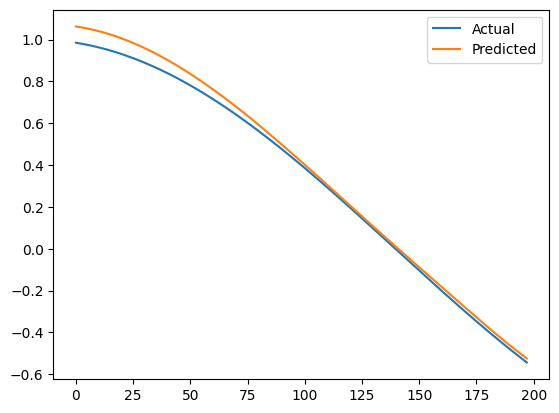

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
tf.config.set_visible_devices([], 'GPU')
t = np.linspace(0, 100, 1000)
data = np.sin(0.1 * t)
scaler = MinMaxScaler()
data = scaler.fit_transform(data.reshape(-1, 1)).flatten()
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)
seq_length = 10
X, y = create_sequences(data, seq_length)
X = X.reshape((X.shape[0], X.shape[1], 1))
train_size = int(0.8 * len(X))
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
model = models.Sequential([layers.Input(shape=(seq_length, 1)), layers.LSTM(50,
activation='relu'), layers.Dense(1)])
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.1, verbose=1)
print(f"Test Loss (MSE): {model.evaluate(X_test, y_test, verbose=0):.6f}")
y_pred = model.predict(tf.convert_to_tensor(X_test), verbose=0)
y_test_rescaled, y_pred_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1)),\
    scaler.inverse_transform(y_pred)
plt.plot(y_test_rescaled, label='Actual')
plt.plot(y_pred_rescaled, label='Predicted')

plt.legend()
plt.show()